In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np

import torch

from source.mfa.mfa import MFA
from source.wgangp.wgan_model import WGAN_GP
from source.dcgan.dcgan_model import Discriminator, Generator, DCGAN
from source.ndb.ndb import NDB

from source.mfa.mfa_utils import get_random_samples
from source.ndb.ndb_utils import sample_from_gan, sample_from_gan_v2

In [5]:
num_train = 80000
num_test = 20000

dataset_root = "/home/konstantin/datasets"

path_to_fa_model = "/home/konstantin/personal/OnGansAndGMMs/run/e1_fa_256_saved_gmm.pkl"
path_to_ppca_model = "/home/konstantin/personal/OnGansAndGMMs/run/e3_ppca_256_saved_gmm.pkl"
path_to_wgangp_model = "/home/konstantin/personal/OnGansAndGMMs/run/wgangp_gen_40.pt"
path_to_dcgan_model = "/home/konstantin/personal/OnGansAndGMMs/run/131000_generator.ckpt"

In [6]:
fa_gmm_model = MFA()
fa_gmm_model.load(path_to_fa_model)

In [7]:
ppca_gmm_model = MFA()
ppca_gmm_model.load(path_to_ppca_model)

In [8]:
z_dim = 100
wgangp_model = WGAN_GP(3, z_dim).cuda()
wgangp_model.G.load_state_dict(torch.load(path_to_wgangp_model))

<All keys matched successfully>

In [10]:
dcgan_model = DCGAN(64, 64, z_dim)
dcgan_model.G.load_state_dict(torch.load(path_to_dcgan_model))

<All keys matched successfully>

In [11]:
train_samples = get_random_samples(dataset_root, num_train).detach().numpy()

In [23]:
fa_samples = fa_gmm_model.draw_samples(num_test, False)
ppca_samples = ppca_gmm_model.draw_samples(num_test, False)
wgangp_samples = sample_from_gan(wgangp_model.G, z_dim, num_test)
dcgan_samples = sample_from_gan_v2(dcgan_model.G, z_dim, num_test)

## NDB test

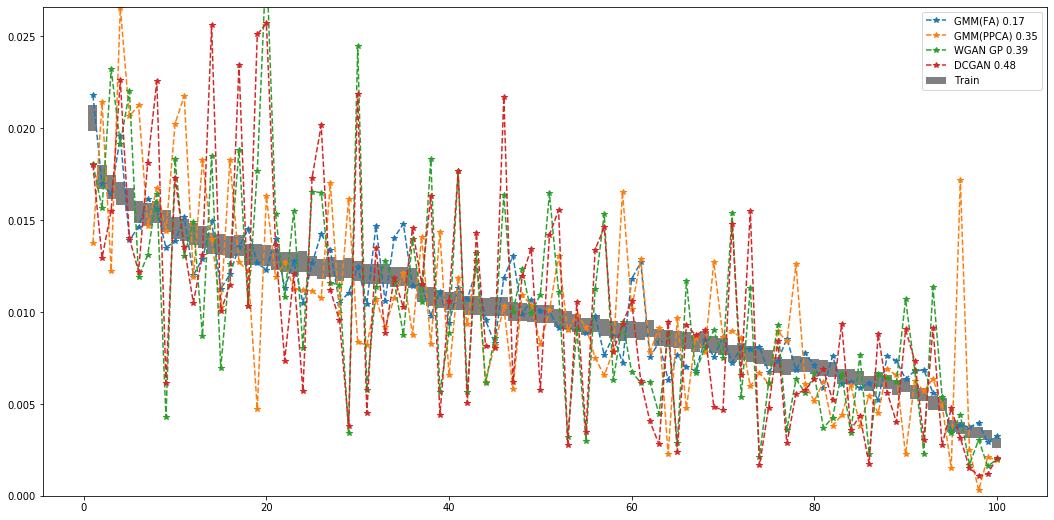

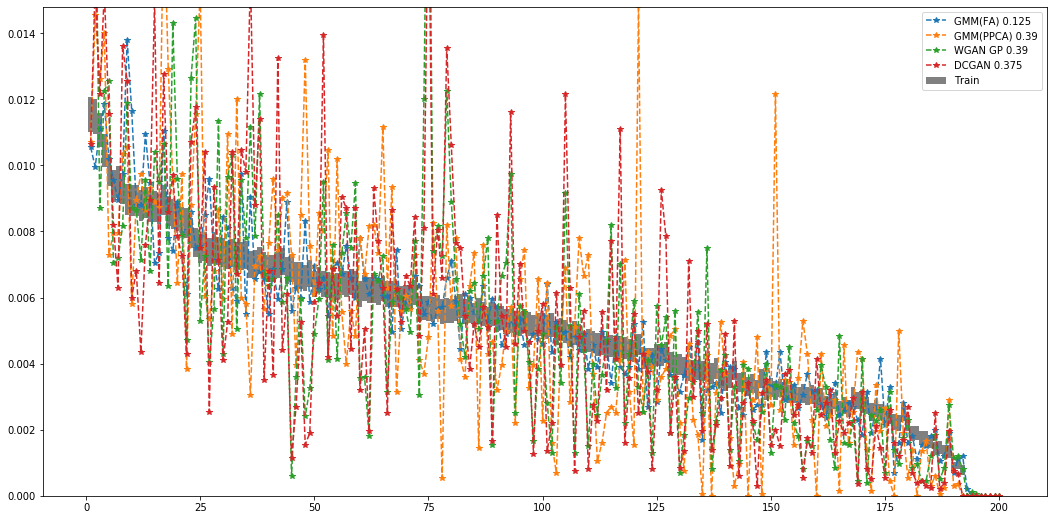

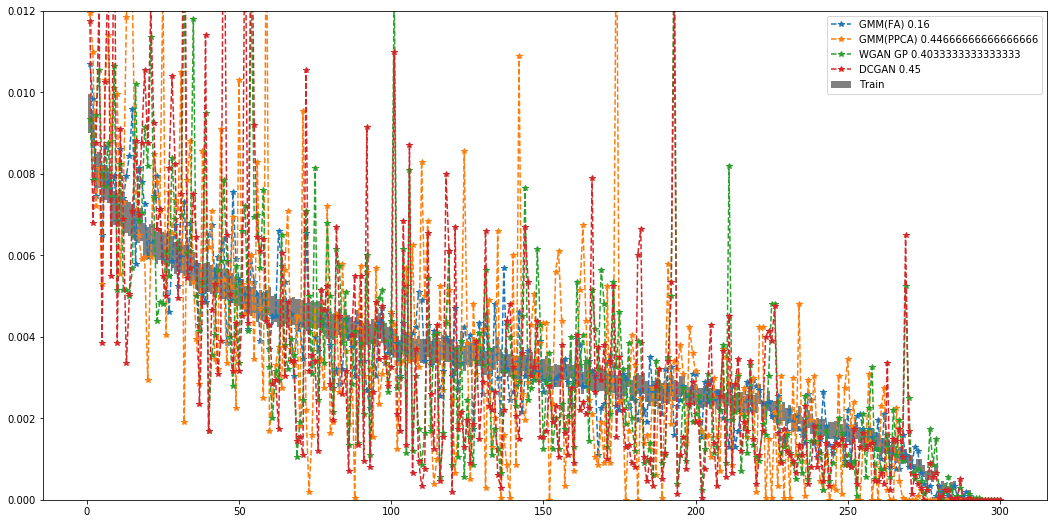

In [24]:
for i in (100, 200, 300):
    ndb = NDB(train_samples, k_clusters=i)
    
    fa_z_stat = ndb.calculate(fa_samples)
    ppca_z_stat = ndb.calculate(ppca_samples)
    wgangp_z_stat = ndb.calculate(wgangp_samples)
    dcgan_z_stat = ndb.calculate(dcgan_samples)
    
    ndb.plot_hist([(fa_samples, f"GMM(FA) {fa_z_stat[0]}"),
                   (ppca_samples, f"GMM(PPCA) {ppca_z_stat[0]}"),
                   (wgangp_samples, f"WGAN GP {wgangp_z_stat[0]}"),
                   (dcgan_samples, f"DCGAN {dcgan_z_stat[0]}")])